Actividad Práctica: Explorando Patrones Ocultos en Datos Reales

Tema: Reducción de dimensionalidad + Clustering no supervisado

Fecha de entrega:  Miercoles 23/07/2025

Objetivo: Aplicar técnicas de reducción de dimensionalidad y clustering para explorar, visualizar y descubrir patrones ocultos en un conjunto de datos realista.

Dataset: Spotify Tracks Dataset (https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db)

# Exploración Inicial de Datos (EDA)


*   Inspeccionar columnas: ¿cuáles son numéricas y útiles para clustering?
*   Normalizar/estandarizar las variables numéricas.
*   OPCIONAL Usar mapas de correlación para eliminar variables redundantes.

## Se importa la base de datos directamente de Kaggle

In [237]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
import pandas as pd

from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "SpotifyFeatures.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zaheenhamidani/ultimate-spotify-tracks-db",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-1403798963.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

## Se visualiza la base de datos para conocer los valores de cada una de las variables.

In [239]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Se muestra la información de cada variable, para saber cuales variables son categoricas y cuales numéricas.

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

## Se revisan cuales son las variables numéricas y categóricas.

* genre: Género musical de la pista.
* artist_name: Nombre del artista de la pista.
* track_name: Nombre de la pista.
* track_id: ID único de la pista en Spotify.
* popularity: Popularidad de la pista, un valor entre 0 y 100, donde 100 es el más popular.
* acousticness: Medida de cuán acústica es la pista, un valor entre 0.0 y 1.0.
* danceability: Describe cuán adecuada es una pista para bailar, un valor entre 0.0 y 1.0.
* duration_ms: Duración de la pista en milisegundos.
* energy: Medida de intensidad y actividad. Las pistas energéticas se sienten rápidas, ruidosas y ruidosas, un valor entre 0.0 y 1.0.
* instrumentalness: Predice si una pista no contiene voces, un valor entre 0.0 y 1.0.
* key: La clave en la que se detecta la pista.
* liveness: Detecta la presencia de una audiencia en la grabación. Los valores más altos representan una mayor probabilidad de que la pista se interprete en vivo.
* loudness: Volumen general de una pista en decibelios (dB).
* mode: Indica la modalidad (mayor o menor) de una pista.
* speechiness: Detecta la presencia de palabras habladas en una pista.
* tempo: El tempo general estimado de una pista en pulsaciones por minuto (BPM).
* time_signature: El compás general estimado de una pista.
* valence: Describe la "positividad musical" transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas), un valor entre 0.0 y 1.0.

In [241]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Variables categoricas: {object_cols}')
number_cols = df.select_dtypes(include=['number']).columns.tolist()
print(f'Variables numericas: {number_cols}')


Variables categoricas: ['genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']
Variables numericas: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [242]:
df.describe(include = 'object').T

,count,unique,top,freq
genre,232725,27,Comedy,9681
artist_name,232725,14564,Giuseppe Verdi,1394
track_name,232724,148614,Home,100
track_id,232725,176774,6sVQNUvcVFTXvlk3ec0ngd,8
key,232725,12,C,27583
mode,232725,2,Major,151744
time_signature,232725,5,4/4,200760


In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


## Se revisa si los datos cuentan con información duplicada y se eliminan si es afirmativo.

Para determinar si hay duplicados, se toma la variable track id la cual contiene un código único por canción.

In [244]:
duplicate_count = df.duplicated(subset='track_id', keep='first')

In [245]:
duplicate_count.sum()

np.int64(55951)

In [246]:
#Se eliminan los duplicacos mediante la función drop duplicates
df.drop_duplicates(subset='track_id', keep='first', inplace=True)

## Se analiza la variable género en para conocer los datos y si es necesario se realiza limpieza de los datos.

In [247]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [248]:
df['genre'].replace({"Children's Music": 'Children Music'}, inplace=True)
df['genre'].replace({'Children’s Music': 'Children Music'}, inplace=True)
df['genre'].replace({'A Capella': 'Acapella'}, inplace=True)

/tmp/ipython-input-1621027628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].replace({"Children's Music": 'Children Music'}, inplace=True)


In [249]:
df.describe(include = 'object').T

,count,unique,top,freq
genre,176774,26,Comedy,9674
artist_name,176774,14564,Giuseppe Verdi,1312
track_name,176773,148399,Home,68
track_id,176774,176774,34XO9RwPMKjbvRry54QzWn,1
key,176774,12,C,20970
mode,176774,2,Major,116619
time_signature,176774,5,4/4,149187


In [250]:
X = df.select_dtypes(include=['number'])

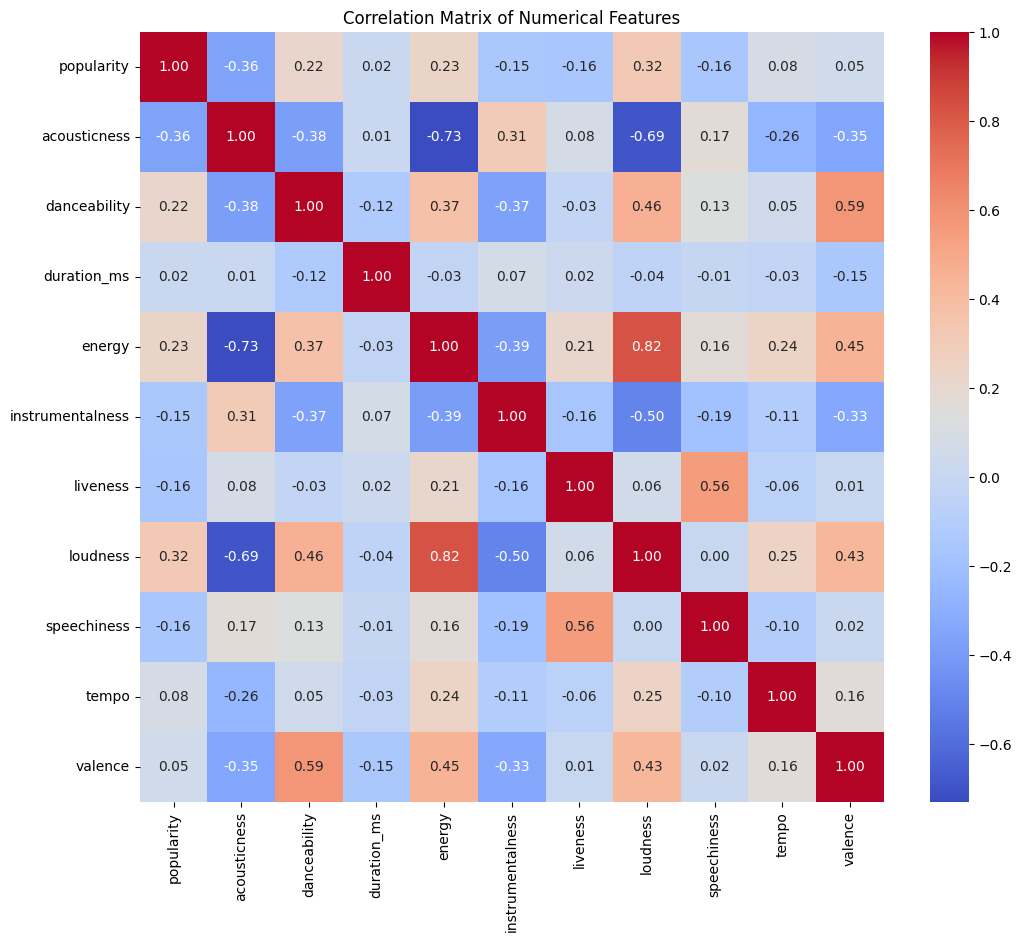

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical columns
corr_matrix = X.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


De acuerdo a la matriz de correlación obtenida, se evidencia que la popularidad no tiene mucha correlación con las demás variables.
Las variables con correlaciones positivas fuertes son:
loudness y energy, lo que indica que las canciones más energicas tienen mayor volumen.
acousticness y energy, las canciones que son muy acusticas tienen a tener poca energia, es decir que no son tan intensas.
acousticness y loudness, lo que indica que las canciones más acusticas tienden a ser más silenciosas.
instumentalness y speechiness, hay una correlación debil, lo que sugiere que las canciones más instrumentales tienen a tener menos vocalizaciones.

## Con la base de datos analizada, se determina que es posible trabajar con los datos numéricos, por lo que se toman las variables numéricas de la base de datos y normalizan con la función StandardScaler

In [252]:
X_scaled = StandardScaler().fit_transform(X)

In [253]:
X_scaled

array([[-2.0857473 ,  0.56474004, -0.79873251, ..., -0.36651461,
         1.58867733,  1.35316957],
       [-2.02824619, -0.43170827,  0.25701577, ..., -0.19866072,
         1.8132264 ,  1.3606373 ],
       [-1.91324396,  1.49566847,  0.64044674, ..., -0.4462819 ,
        -0.56554437, -0.31213356],
       ...,
       [-0.2457116 ,  0.44189025, -0.62014822, ..., -0.41006853,
        -1.18693299,  0.16953484],
       [ 0.09929509, -1.01347029,  1.28124918, ..., -0.45851615,
        -0.10769924,  1.93191841],
       [-0.07320826, -0.83765858,  1.13943224, ..., -0.48298465,
        -0.10556037,  0.10232529]])

# Reducción de Dimensionalidad

*   Aplicar PCA para reducir la dimensionalidad, visualizando varianza explicada.
*   Aplicar t-SNE para explorar agrupamientos no lineales (diferente forma de visualizar).
*   Graficar los resultados en 2D: ¿hay grupos naturales visibles?


/tmp/ipython-input-458618732.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], palette='Set2')


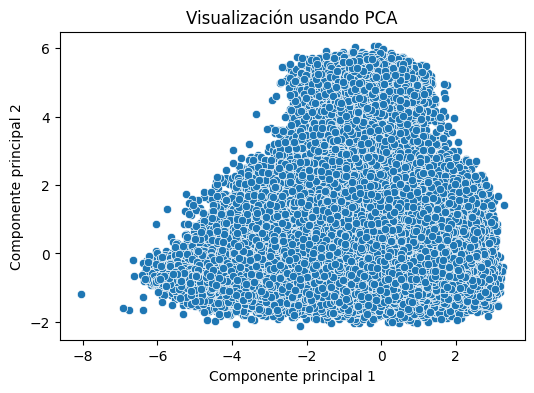

In [254]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
#Para reducir la dimensionalidad, aplicaremos un 96% de varianza con el fin de obtener mejor relación de los datos obtenidos.
pca = PCA(n_components=0.96)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], palette='Set2')
plt.title('Visualización usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

No se evidencian grupos visibles ya que se están intentando graficar en 9 dimensiones, pero la idea de usar la mayoría de variables es tratar de calsificar los datos de la manera más cercana a la original.

In [255]:
pca.explained_variance_ratio_
#Se obtienen 9 variables de 11

array([0.33234885, 0.16222651, 0.10618997, 0.08937436, 0.07782637,
       0.06611509, 0.05922508, 0.04097994, 0.03148463])

Tambien se aplica reducción de dimensionalidad de acuerdo a los resultados obtenidos en la matriz de correlación, de acuerdo a la teoria se eliminan las variables que más correlación tienen, es decir loudness y acousticness para comparar el resultado con la reducción con PCA

In [256]:
#Se eliminan las variables
X_reduced = X.drop(columns=['loudness', 'acousticness'])

print("\nTamaño del dataset:")
print(X_reduced.shape)

#Muestra el valor del dataset reducido
print("\nValor de correlación:")
display(X_reduced.corr())


Tamaño del dataset:
(176774, 9)

Valor de correlación:


,popularity,danceability,duration_ms,energy,instrumentalness,liveness,speechiness,tempo,valence
popularity,1.000000,0.222052,0.019349,0.234068,-0.147899,-0.161714,-0.162072,0.082825,0.048818
danceability,0.222052,1.000000,-0.124258,0.365232,-0.370872,-0.026899,0.133137,0.046786,0.587601
duration_ms,0.019349,-0.124258,1.000000,-0.029969,0.069618,0.023598,-0.011580,-0.030055,-0.146981
energy,0.234068,0.365232,-0.029969,1.000000,-0.391797,0.210485,0.162432,0.241539,0.449565
instrumentalness,-0.147899,-0.370872,0.069618,-0.391797,1.000000,-0.162712,-0.191648,-0.109288,-0.331214
liveness,-0.161714,-0.026899,0.023598,0.210485,-0.162712,1.000000,0.555547,-0.062021,0.005851
speechiness,-0.162072,0.133137,-0.011580,0.162432,-0.191648,0.555547,1.000000,-0.101591,0.018769
tempo,0.082825,0.046786,-0.030055,0.241539,-0.109288,-0.062021,-0.101591,1.000000,0.159027
valence,0.048818,0.587601,-0.146981,0.449565,-0.331214,0.005851,0.018769,0.159027,1.000000


In [257]:
X_scaled_corr = StandardScaler().fit_transform(X_reduced)

/tmp/ipython-input-2004112988.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca_corr[:,0], y=X_pca_corr[:,1], palette='Set2')


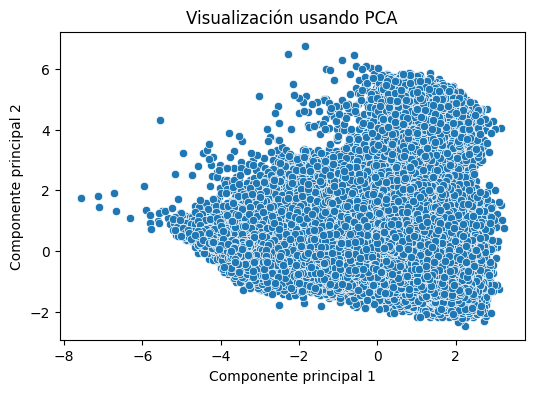

In [258]:
#Para reducir la dimensionalidad, aplicaremos un 96% de varianza con el fin de obtener mejor relación de los datos obtenidos.
pca = PCA(n_components=0.96)
X_pca_corr = pca.fit_transform(X_scaled_corr)

plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca_corr[:,0], y=X_pca_corr[:,1], palette='Set2')
plt.title('Visualización usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# Clustering No Supervisado

Agrupar instancias similares sin usar etiquetas, y explorar qué representan esos grupos.

*     Aplicar clustering (con KMeans o con DBSCAN) sobre los datos reducidos con PCA.
*     Visualizar los clusters en 2D con color.
*     Etiquetar los clusters con algún nombre provisional


In [259]:
from sklearn.manifold import TSNE

In [260]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=26, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
#Se aplica clusterin teniendo en cuenta que queremos clasificar los generos, los generos obtenidos en la base de datos son 26 (obtenidos despues de la limpieza de los datos)

In [261]:
kmeans = KMeans(n_clusters=26, random_state=42)
labels_kmeans_corr = kmeans.fit_predict(X_pca_corr)

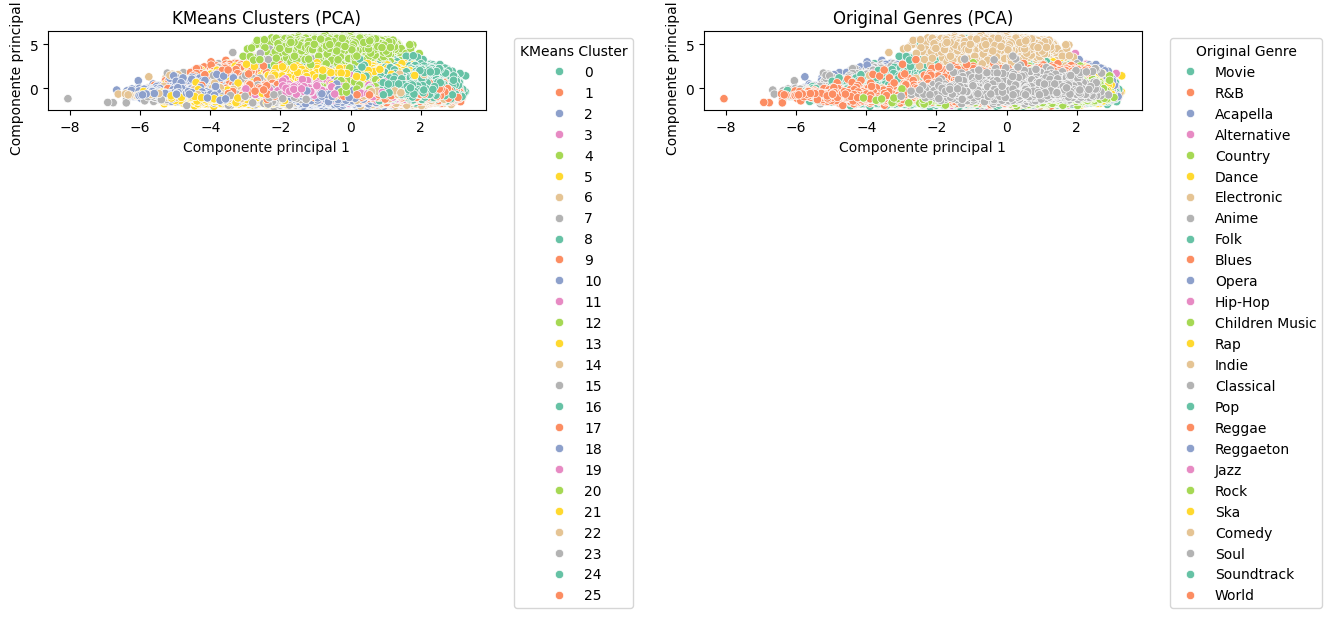

In [262]:
# Visualizar KMeans y género original lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 4)) # Increased figure size for better legend placement

# Plot KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set2', ax=axes[0])
axes[0].set_title("KMeans Clusters (PCA)")
axes[0].set_xlabel("Componente principal 1")
axes[0].set_ylabel("Componente principal 2")
axes[0].legend(title='KMeans Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside

# Plot original genre
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['genre'], palette='Set2', ax=axes[1])
axes[1].set_title("Original Genres (PCA)")
axes[1].set_xlabel("Componente principal 1")
axes[1].set_ylabel("Componente principal 2")
axes[1].legend(title='Original Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legends
plt.show()

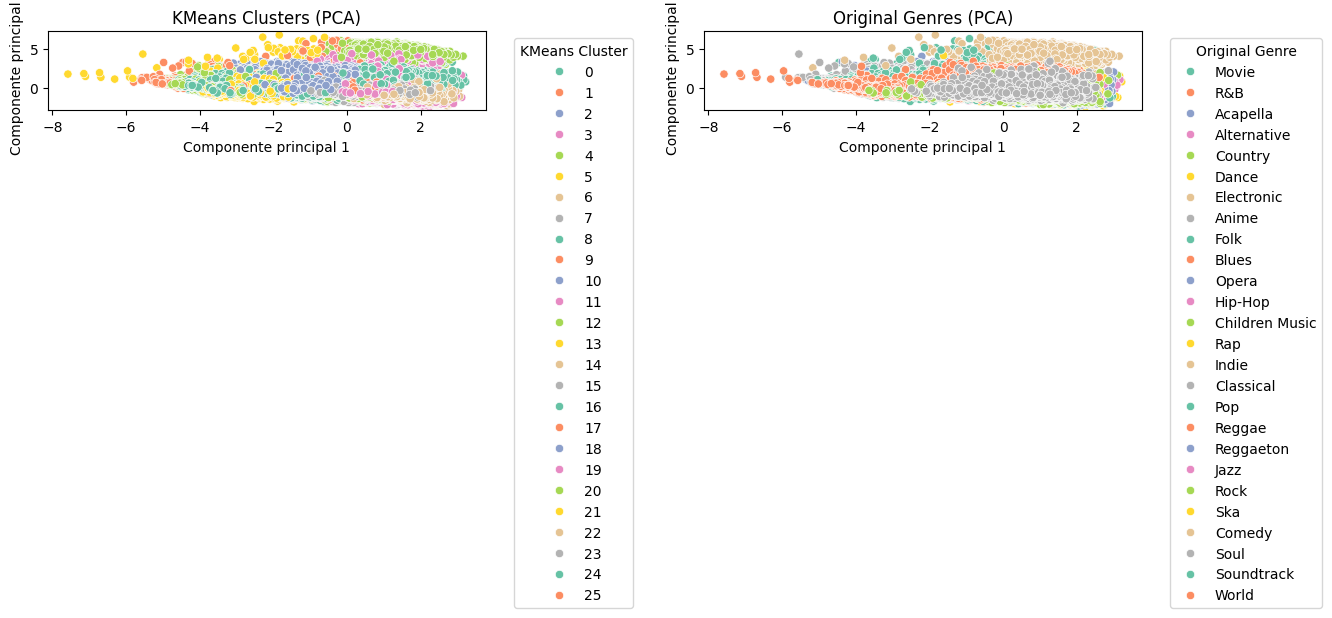

In [263]:
# Visualizar KMeans y género original lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot KMeans
sns.scatterplot(x=X_pca_corr[:, 0], y=X_pca_corr[:, 1], hue=labels_kmeans_corr, palette='Set2', ax=axes[0])
axes[0].set_title("KMeans Clusters (PCA)")
axes[0].set_xlabel("Componente principal 1")
axes[0].set_ylabel("Componente principal 2")
axes[0].legend(title='KMeans Cluster', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside

# Plot original genre
sns.scatterplot(x=X_pca_corr[:, 0], y=X_pca_corr[:, 1], hue=df['genre'], palette='Set2', ax=axes[1])
axes[1].set_title("Original Genres (PCA)")
axes[1].set_xlabel("Componente principal 1")
axes[1].set_ylabel("Componente principal 2")
axes[1].legend(title='Original Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legends
plt.show()

Se realiza comparativa entre reducción con pca y reducción con matriz de correlación y pca para verificar el comportamiento del modelo KMeans.
Se evidencia que debido a la cercanía de los datos, no hay una correcta clasificación de acuerdo a los datos originales.

Interpretación y Evaluación

Validar si los clusters tienen sentido, y qué representan en términos reales.

*   Calcular métricas como Silhouette Score (-1: mal agrupado)  o  +1 :excelente agrupamiento) para ver que tan bien estan armados los clusters.
*   Analizar características promedio por cluster. (En este punto será necesario unir los resultados de la reduccion de dimensionalidad con los datos originales para hacer el análisis basado en las columnas iniciales) --> Esta union se puede realizar con un merge, los datos originales y los datos despues de la reducción de dimensionalidad conservan el orden, y pueden unirse por el indice.
*   Usar la columna género para determinar ¿Qué género predomina en cada cluster? ¿Estos generos son movidos, energéticos, pasivos?

In [264]:
from sklearn.metrics import silhouette_score
#score_kmeans = silhouette_score(X_pca, labels_kmeans)
#print(f"Silhouette Score KMeans: {score_kmeans:.2f}")

#Se demoró y no ejecutó

In [265]:
df.shape

(176774, 18)

In [266]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [267]:
X_pca.shape

(176774, 9)

In [268]:
labels = pd.DataFrame(labels_kmeans)

In [269]:
print(labels)

         0
0       24
1       24
2        0
3       21
4       21
...     ..
176769  16
176770  14
176771   3
176772  16
176773  16

[176774 rows x 1 columns]


In [270]:
X_pca=pd.DataFrame(X_pca)
X_pca = pd.merge(X_pca,labels, left_index=True, right_index=True)
X_pca.head()

,0_x,1,2,3,4,5,6,7,8,0_y
0,1.205938,0.822834,-0.589299,2.888305,0.653643,-0.788929,-0.958482,0.595989,-0.704315,24
1,1.435855,0.114557,-1.037519,2.497859,1.230110,-0.297802,-0.606337,-0.284127,-0.079093,24
2,-1.799407,0.349988,-1.869300,0.079412,0.869513,0.259309,-1.292193,-0.427008,0.774673,0
3,-1.657980,-0.218765,-0.125244,2.686312,0.242625,0.429613,-1.645182,-0.482195,-0.058117,21
4,-2.573470,0.334159,-1.332324,1.897115,0.128132,0.388305,-0.952095,0.296336,-0.020095,21


In [271]:
data = pd.merge(df, X_pca, left_index=True, right_index=True)
data.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,0_x,1,2,3,4,5,6,7,8,0_y
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,...,1.205938,0.822834,-0.589299,2.888305,0.653643,-0.788929,-0.958482,0.595989,-0.704315,24
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,...,1.435855,0.114557,-1.037519,2.497859,1.230110,-0.297802,-0.606337,-0.284127,-0.079093,24
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,...,-1.799407,0.349988,-1.869300,0.079412,0.869513,0.259309,-1.292193,-0.427008,0.774673,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,...,-1.657980,-0.218765,-0.125244,2.686312,0.242625,0.429613,-1.645182,-0.482195,-0.058117,21
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,...,-2.573470,0.334159,-1.332324,1.897115,0.128132,0.388305,-0.952095,0.296336,-0.020095,21


In [272]:
data.groupby("0_y")['duration_ms'].mean()

,duration_ms
0_y,
0,230529.372541
1,231688.812112
2,220490.653561
3,236577.657184
4,289790.741207
5,226044.188603
6,237799.432094
7,247016.093418
8,241341.727197


In [273]:
data.groupby("0_y")['energy'].mean()

,energy
0_y,
0,0.588819
1,0.583418
2,0.651600
3,0.572102
4,0.367267
5,0.653177
6,0.639024
7,0.585673
8,0.568522


In [274]:
# Creating a cross-tabulation
result = pd.crosstab(data['genre'], data['0_y'])
print(result)

0_y               0     1    2    3     4    5     6   7    8     9   ...  \
genre                                                                 ...   
Acapella          30     0    0    4     0    0     0   0    0     0  ...   
Alternative        4  1198   27  383     4   31  1686   2  331   603  ...   
Anime             87    49  385  202     2  308  1001  11  145   456  ...   
Blues            867   223   76  439    70   43   408  44  254   476  ...   
Children Music    48   257  399  180    10  224    95  43  123   129  ...   
Classical        116   186   40   78  5542   29    85  45  175    73  ...   
Comedy            34   460  264  671     4  156   408  56  206  1147  ...   
Country            7   128    0  364     1    0   332   0  144   320  ...   
Dance             21  2527    0  119     0    5   664   0  352   215  ...   
Electronic         4   362   18  368     5   48   883  16  355   627  ...   
Folk             439   953   33  664    31   46   371   9  247   278  ...   

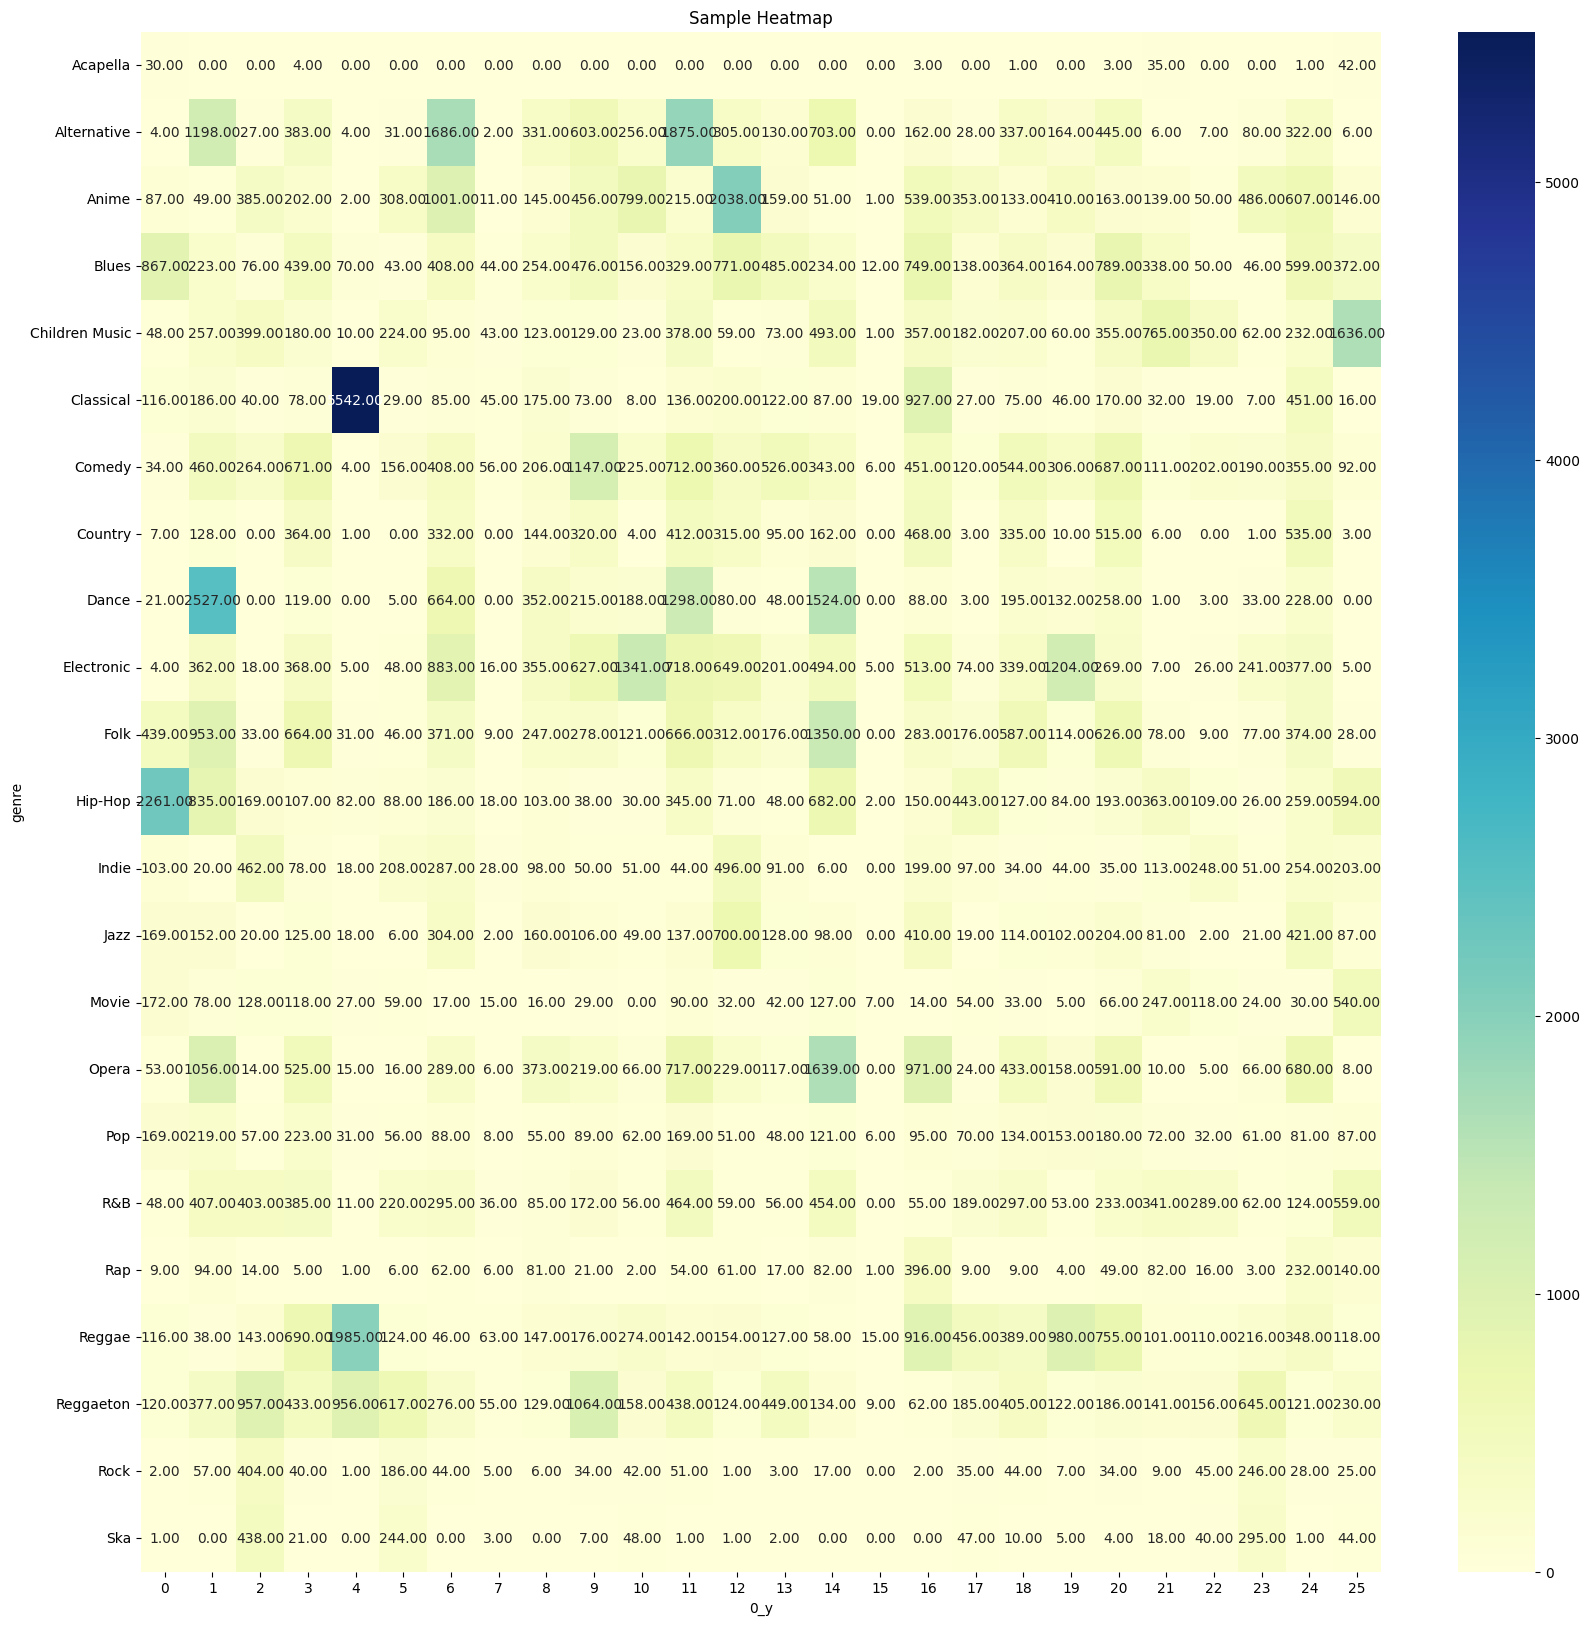

In [275]:
plt.figure(figsize=(20, 20))
sns.heatmap(result, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Sample Heatmap")
plt.show()

Según el resultado obtenido:


*   El cluster 8 predomina el genero classical.
*   El cluster 5 el genero Reggae tiene un valor alto en este cluster, en otros tambien tiene presencia pero en este sobresale.
* Classical y Comedy son géneros muy "concentrados", es decir, la gran mayoría de sus canciones se agrupan en uno o dos clusters específicos.
* Géneros como Electronic, Folk, y Hip-Hop están más "dispersos" a lo largo de varios clusters, lo que indica una mayor variabilidad en las características de las canciones dentro de estos géneros. Por ejemplo, una canción de Hip-Hop podría ser más enérgica y otra más acústica, lo que haría que terminaran en clusters diferentes.

